In [161]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [162]:
warnings.filterwarnings('ignore')

In [163]:
col_names = ['user_id', 'item_id', 'rating', 'timestamp']

df = pd.read_csv('u.data', sep = '\t', names = col_names)
df.drop(columns = 'timestamp', inplace = True)
print(df.shape)
df.head()

(100000, 3)


,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [164]:
print('No. of unique users :', df['user_id'].nunique())
print('No. of movies :',df['item_id'].nunique())

No. of unique users : 943
No. of movies : 1682


In [165]:
data = pd.read_csv('u.item', sep = '\|', header = None)
movie_title = data[[0, 1]]
movie_title.columns = ['item_id', 'title']
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [166]:
df = pd.merge(df, movie_title, on = 'item_id')

In [167]:
df

,user_id,item_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)
...,...,...,...,...
99995,840,1674,4,Mamma Roma (1962)
99996,655,1640,3,"Eighth Day, The (1996)"
99997,655,1637,3,Girls Town (1996)
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


# Exploratory Data Analysis

In [168]:
df.groupby('title').mean()['rating'].sort_values(ascending = False) # groupby() splits the data into groups so that we can apply functions to it

title
Marlene Dietrich: Shadow and Light (1996)       5.0
Prefontaine (1997)                              5.0
Santa with Muscles (1996)                       5.0
Star Kid (1997)                                 5.0
Someone Else's America (1995)                   5.0
                                               ... 
Touki Bouki (Journey of the Hyena) (1973)       1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Daens (1992)                                    1.0
Butterfly Kiss (1995)                           1.0
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Name: rating, Length: 1664, dtype: float64

In [169]:
df.groupby('title').count()['user_id'].sort_values( ascending = False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: user_id, Length: 1664, dtype: int64

In [170]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])
ratings['num of ratings'] = df.groupby('title').count()['user_id']
ratings.sort_values('rating', ascending = False).head()

,rating,num of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


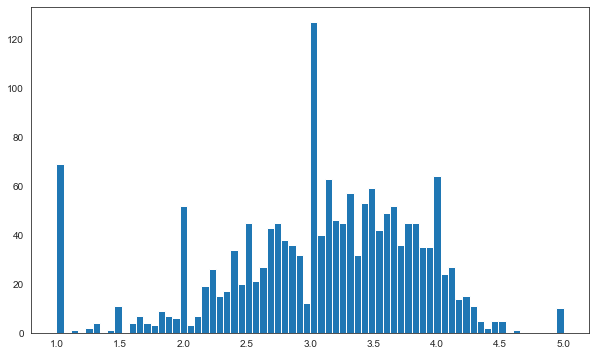

In [171]:
plt.figure(figsize = (10,6))
plt.hist(ratings['rating'], bins = 70)
plt.show()

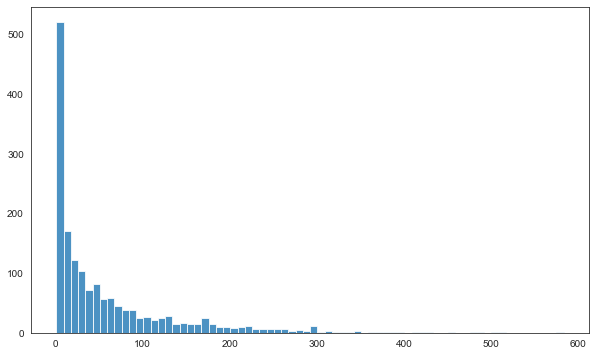

In [172]:
plt.figure(figsize = (10,6))
plt.hist(ratings['num of ratings'], bins = 70, alpha = 0.8)
plt.show()

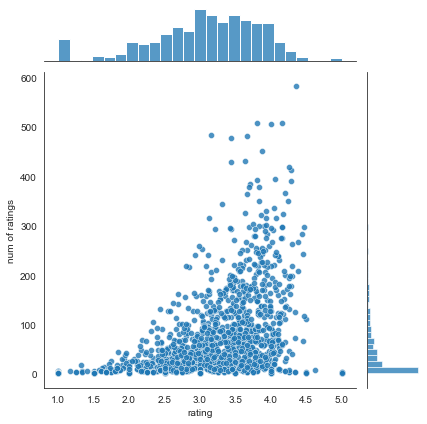

In [173]:
sns.jointplot(x= 'rating', y= 'num of ratings', data= ratings, alpha = 0.8)
plt.show()

# Movie Recommendation Model

In [174]:
df

,user_id,item_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)
...,...,...,...,...
99995,840,1674,4,Mamma Roma (1962)
99996,655,1640,3,"Eighth Day, The (1996)"
99997,655,1637,3,Girls Town (1996)
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [175]:
# creating a matrix
movie_mat = df.pivot_table(index= 'user_id',columns = 'title', values= 'rating')
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [176]:
ratings.sort_values(by = 'num of ratings', ascending=False).head()

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [177]:
starWars_user_rating = movie_mat['Star Wars (1977)']

In [178]:
similar_to_starwars = pd.DataFrame(movie_mat.corrwith(starWars_user_rating), columns = ['correlation'])
similar_to_starwars.dropna(inplace = True)

In [179]:
similar_to_starwars = similar_to_starwars.join(ratings['num of ratings'])
similar_to_starwars.head()

,correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [184]:
similar_to_starwars[similar_to_starwars['num of ratings'] > 100].sort_values('correlation', ascending = False)

,correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


In [215]:
def recommend(movie_name):
    movie_user_rating = movie_mat[movie_name]
    
    similar_to_movie = pd.DataFrame(movie_mat.corrwith(movie_user_rating), columns = ['correlation'])
    similar_to_movie.dropna(inplace = True)
    similar_to_movie = similar_to_movie.join(ratings['num of ratings'])
    prediction = similar_to_movie[similar_to_movie['num of ratings'] > 100].sort_values('correlation', ascending = False).head(n = 10)
    return prediction

In [216]:
recommend('Titanic (1997)')

,correlation,num of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
William Shakespeare's Romeo and Juliet (1996),0.430243,106
"Last of the Mohicans, The (1992)",0.427239,128
Outbreak (1995),0.426237,104
Die Hard (1988),0.403124,243
